In [152]:
import tensorflow as tf

2.17.1


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [155]:
# seperating dependent and independent dataset

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [156]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [157]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# Feature Engineering

In [158]:
# One hot Encoder

geography = pd.get_dummies(X['Geography'], drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'], drop_first=True).astype(int)

I did this because the dropped column will always be true in respect to the missing value since we have just two instances; 0 and 1

In [159]:
# concatenate these variables with the dataframe

# Firstly I will need to drop the engineered columns

X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [160]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [161]:
X = pd.concat([X, geography, gender], axis=1)

In [162]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [163]:
# Split dataset into Training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [164]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [166]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [167]:
X_train.shape

(8000, 11)

# Create ANN

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [169]:
# Initialize ANN

tf.random.set_seed(42)
classifier = Sequential()

In [170]:
# Adding the input Layer

classifier.add(Dense(units=11, activation='relu'))

In [171]:
# adding the first hidden layer

classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [172]:
# adding the second hidden layer

classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [173]:
# Adding the Output Layer

classifier.add(Dense(units=1, activation='sigmoid'))

In [174]:
# implementing Learning rate

import tensorflow

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [175]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
# Early Stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=0,  # You might want to increase patience to allow for some fluctuations
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [177]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7815 - loss: 0.5025 - val_accuracy: 0.8198 - val_loss: 0.4115
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8165 - loss: 0.4203 - val_accuracy: 0.8277 - val_loss: 0.3968
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8334 - loss: 0.3987 - val_accuracy: 0.8421 - val_loss: 0.3827
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8324 - loss: 0.3918 - val_accuracy: 0.8311 - val_loss: 0.3770
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.3852 - val_accuracy: 0.8307 - val_loss: 0.3824
Epoch 5: early stopping


In [178]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Summary For Accuracy

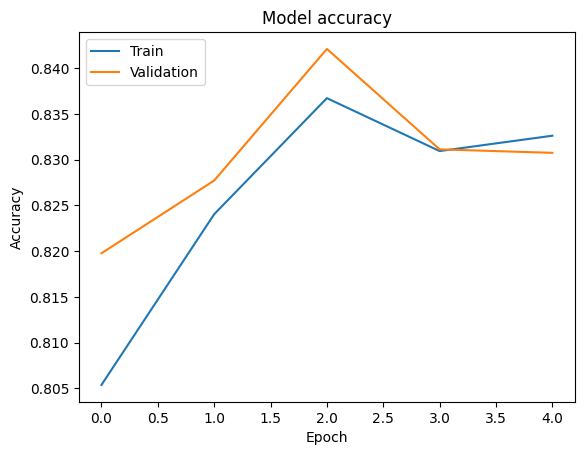

In [179]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Summary For Loss

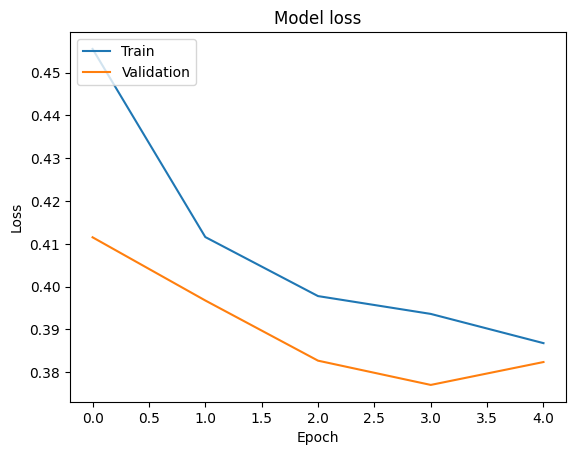

In [180]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Making Predictions and Evaluating the Model

In [181]:
# Predict the Test set Results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [182]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1586,    9],
       [ 315,   90]])

In [183]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
print(f"Accuracy: {score:.2f}")

Accuracy: 0.84


In [184]:
# Get the weights

classifier.get_weights()

[array([[-0.01701391,  0.6037005 ,  0.08940651,  0.2213197 ,  0.01550101,
         -0.1295914 , -0.4263129 ,  0.14732276, -0.02471386, -0.02256425,
          0.04211529],
        [ 1.0383971 , -0.22500423, -1.1775028 , -0.92420024, -0.25216064,
          1.2562265 , -0.01631305,  0.14440484, -1.0178894 ,  0.14791381,
          0.70915496],
        [ 0.1764175 , -0.24533074, -0.20901105, -0.07414462, -0.28098825,
          0.10383797, -0.31218034,  0.6282391 ,  0.20929646,  0.05012063,
         -0.04615826],
        [-0.16589639, -0.2009549 ,  0.38870862, -0.5516278 , -0.7706227 ,
         -0.47976395, -0.24400088, -0.60223377, -0.8524757 ,  0.27649882,
          0.6791743 ],
        [-0.15370001, -0.1271166 , -0.2608504 ,  0.01669588, -1.8544188 ,
         -1.494327  , -0.04566454,  0.21112151,  0.32147157,  1.7553304 ,
          0.85567254],
        [ 0.00441064,  0.20471513,  0.19514479,  0.3652075 ,  0.119362  ,
         -0.18481228, -0.30316362,  0.05853338, -0.66048384,  0.1114110